In [46]:
import selenium
import time
import os
import io
import hashlib
from PIL import Image
from selenium import webdriver

In [12]:
DRIVER_PATH = r'C:\Users\Tejas Ravishankar\Desktop\Scraping\chromedriver'
wd = webdriver.Chrome(executable_path=DRIVER_PATH)

In [13]:
wd.get('https://google.com')

In [14]:
wd.quit()

In [51]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(1)
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [62]:
def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [63]:
def search_and_download(search_term:str,driver_path:str,target_path=r'C:\Users\Tejas Ravishankar\Desktop\Scraping',number_images=5):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

Found: 200 search results. Extracting links from 0:200
Found: 21 image links, done!
ERROR - Could not save  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
ERROR - Could not save  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment
SUCCESS - saved https://i.pinimg.com/originals/c7/31/cf/c731cf04c31fb2c1132d392044a392fe.jpg - as C:\Users\Tejas Ravishankar\Desktop\Scraping\jim_halpert\16863b98f8.jpg
SUCCESS - saved https://i.pinimg.com/236x/ef/e9/93/efe9939f6e97a669a8e4d9cc7cbdc207.jpg - as C:\Users\Tejas Ravishankar\Desktop\Scraping\jim_halpert\288bc1bd8c.jpg
SUCCESS - saved https://hips.hearstapps.com/hbz.h-cdn.co/assets/15/13/980x490/landscape-1427146059-hbz-john-krasinski-the-office.jpg?resize=480:* - as C:\Users\Tejas Ravishankar\Desktop\Scraping\jim_halpert\0d8e685a4f.jpg
ERROR - Could not save  - No connection adapters were f
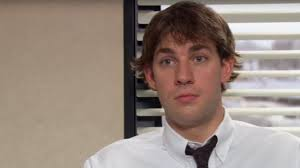
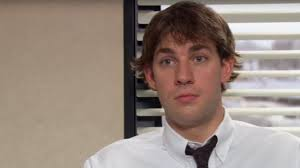
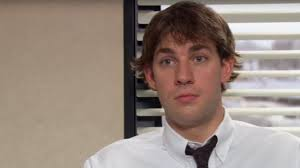
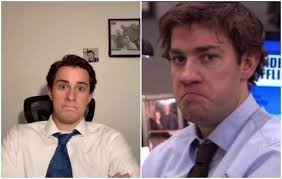
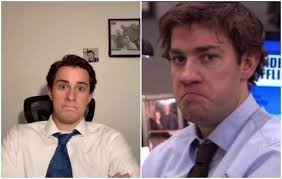
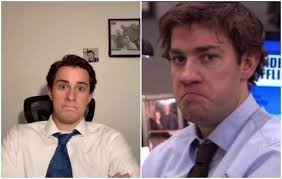
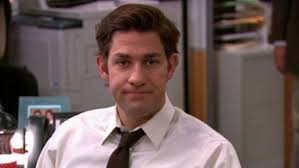
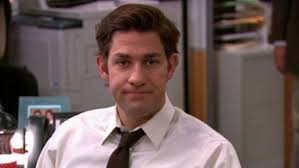
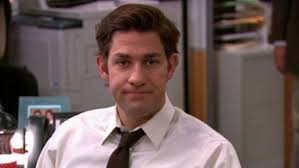
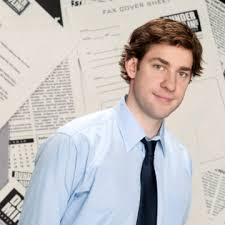
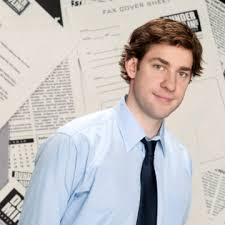
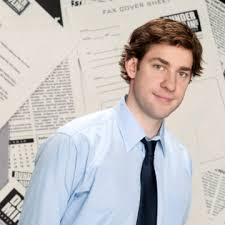
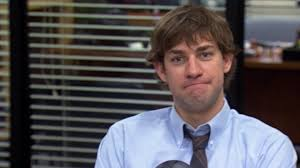
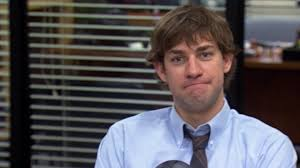
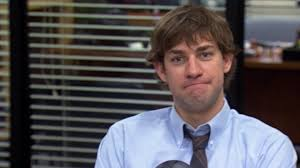
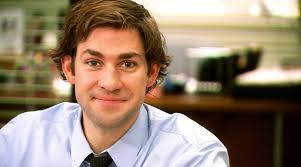
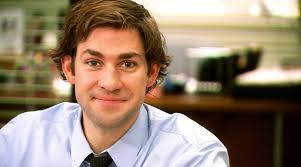
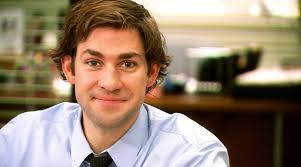
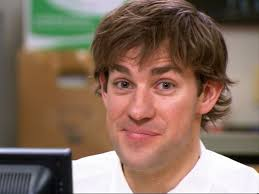
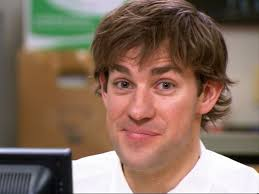
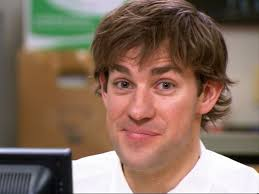
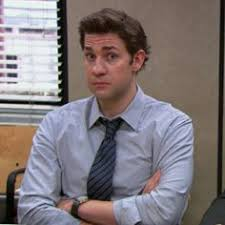
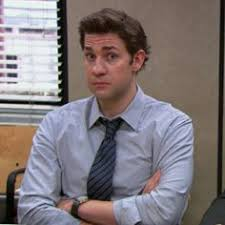
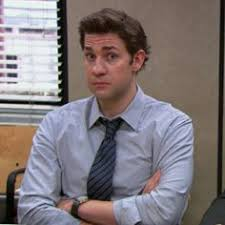
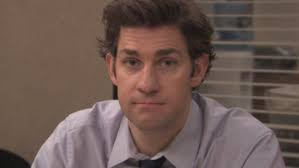
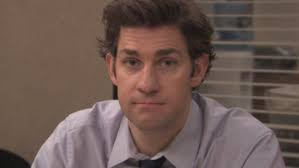
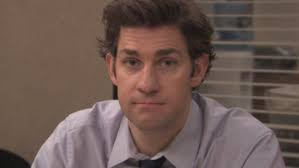
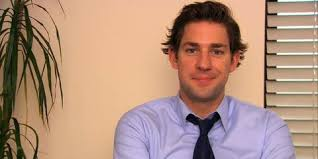
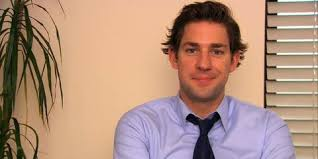
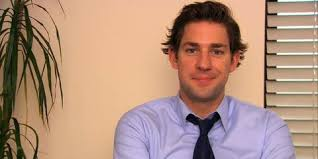
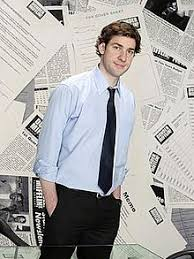
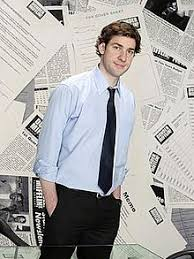
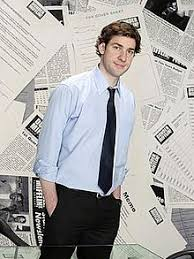

In [64]:
search_term = "Jim Halpert"
driver_path = r'C:\Users\Tejas Ravishankar\Desktop\Scraping\chromedriver'
search_and_download(search_term=search_term,driver_path=driver_path,number_images=20)

In [ ]:
wd.quit()